1.データローダーでDatasetsを作成  
2.classの定義 インスタンス化  
3.loss関数、最適化手法を定義  
4.for 文  
- inputs,  outputsを定義
- 勾配初期化　optimizer.zero_grad()
- predict　model()
- lossを計算　criterion()
- 勾配を計算　loss.backward()
- パラメータの更新　optimizer.step()

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.002

In [3]:
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)
print("ORG:", x_train)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("RESHAPE:",x_train)

ORG: [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  3.1  ]
RESHAPE: [[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]


In [17]:
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.linear(x)
    return out

In [18]:
model = Net(input_size, output_size)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
for epoch in range(num_epochs):
  inputs = torch.tensor(x_train)
  targets = torch.tensor(y_train)
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))
# save the model
torch.save(model.state_dict(), 'model.pkl')

Epoch [100/1000], Loss: 0.2610
Epoch [200/1000], Loss: 0.2520
Epoch [300/1000], Loss: 0.2439
Epoch [400/1000], Loss: 0.2365
Epoch [500/1000], Loss: 0.2299
Epoch [600/1000], Loss: 0.2240
Epoch [700/1000], Loss: 0.2186
Epoch [800/1000], Loss: 0.2138
Epoch [900/1000], Loss: 0.2094
Epoch [1000/1000], Loss: 0.2054


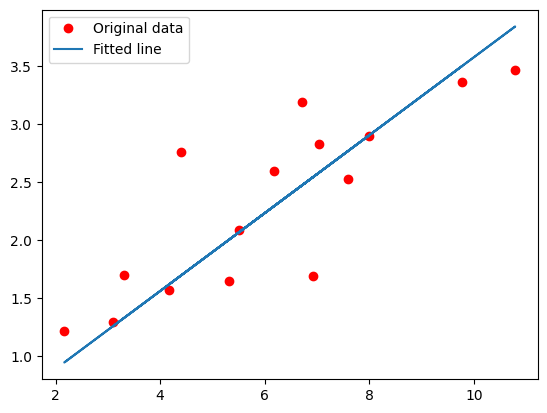

In [29]:
predicted = model(torch.tensor(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()